# Linear regression in Python

## Lab Objectives

  - Fitting a linear regression model in Python
  - Compute evaluation metrics
  
In the lectures, we focussed on using R for linear regression. This probably what you are most familiar with: we use R in both STAT 1150 and 2150.

But as we start building more complex models, and using other approaches, it will make more sense to start fitting these models in Python. In particular, we will make use of the very complete, and very powerful,`scikit-learn` library.

We will explore these ideas using the Wage dataset, discussed in the book *Introduction to Statistical Learning*, by James *et al*. If you're interested, it's available online: https://www.statlearning.com/.

In [1]:
import pandas as pd

data = pd.read_csv("wage.csv")
# In R: head(data)
# In Python: data.head()
print(data.head())

   year  age            maritl      race        education        jobclass  \
0  2006   18  1. Never Married  1. White     1. < HS Grad   1. Industrial   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Information   
2  2003   45        2. Married  1. White  3. Some College   1. Industrial   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Information   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Information   

           health health_ins   logwage        wage  
0       1. <=Good      2. No  4.318063   75.043154  
1  2. >=Very Good      2. No  4.255273   70.476020  
2       1. <=Good     1. Yes  4.875061  130.982177  
3  2. >=Very Good     1. Yes  5.041393  154.685293  
4       1. <=Good     1. Yes  4.318063   75.043154  


In [2]:
data

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [3]:
data.head(5)

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
data.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
data.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'jobclass', 'health',
       'health_ins', 'logwage', 'wage'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   jobclass    3000 non-null   object 
 6   health      3000 non-null   object 
 7   health_ins  3000 non-null   object 
 8   logwage     3000 non-null   float64
 9   wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df = data.copy()

In [8]:
df

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [9]:
wage = data["wage"]

In [10]:
wage

0        75.043154
1        70.476020
2       130.982177
3       154.685293
4        75.043154
           ...    
2995    154.685293
2996     99.689464
2997     66.229408
2998     87.981033
2999     90.481913
Name: wage, Length: 3000, dtype: float64

In [11]:
import matplotlib.pyplot as plt
import numpy as np

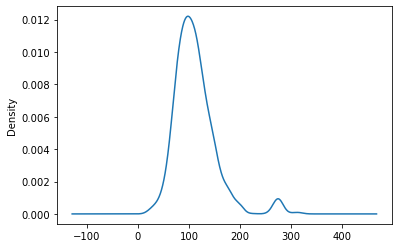

In [12]:
ax = data["wage"].plot.kde()

We want to predict `wage` based on the other variables using linear regression. There are two main packages to do linear regression in Python:

  1. `statsmodels`: its interface is very similar to R, based on formulas.
  2. `scikit-learn`: the main package for machine learning.
  
We will look at both packages in order.

Let's start by spliting our dataset in two pieces: train and test. The dataframe `data` has 3000 rows. We will randomly select 300 of them for the test dataset (i.e. about 10%), and the rest will form the training set.

In [13]:
data_test = data.sample(n = 300, random_state = 1234)
data_train = data.drop(data_test.index)

data_train.shape[0], data_test.shape[0]

(2700, 300)

We will import the submodule which uses formula. For linear regression, we need to use the `ols` method. Look at the documentation to see what other models you can fit: https://www.statsmodels.org/stable/api.html#statsmodels-formula-api. 

In [14]:
import statsmodels.formula.api as smf

# Note: The formula is passed as a string
fit = smf.ols('wage ~ 1', data = data_train).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                nan
Time:                        16:20:53   Log-Likelihood:                -13954.
No. Observations:                2700   AIC:                         2.791e+04
Df Residuals:                    2699   BIC:                         2.792e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.2312      0.818    137.244      0.0

Next, we can use the `predict` method to get predicted values.

In [15]:
pred_vals = fit.predict(data_test)
print(pred_vals)

1936    112.23118
85      112.23118
2045    112.23118
1230    112.23118
2676    112.23118
          ...    
613     112.23118
2236    112.23118
2141    112.23118
576     112.23118
842     112.23118
Length: 300, dtype: float64


In [16]:
# RMSE
import numpy as np

actual_vals = data_test['wage']
np.sqrt(np.mean((pred_vals - actual_vals)**2))

34.14792619490068

In [17]:
# MAPE
100*np.mean(np.abs((pred_vals - actual_vals)/actual_vals))

29.44715188917208

Now let's use `age` as a covariate and see if we can improve the prediction accuracy.

In [18]:
fit2 = smf.ols('wage ~ age', data = data_train).fit()
pred_vals2 = fit2.predict(data_test)
rmse2 = np.sqrt(np.mean((pred_vals2 - actual_vals)**2))
mape2 = 100*np.mean(np.abs((pred_vals2 - actual_vals)/actual_vals))

print('RMSE2:',rmse2)
print('MAPE2:',mape2)

RMSE2: 32.953519349586735
MAPE2: 27.93519019628437


Just like in the lecture, we can try to add more covariates and see what happens.

### Exercise

Fit a model with age and education as covariates. Compute the RMSE and the MAPE values.

In [19]:
# Write your code here

fit3 = smf.ols('wage ~ age+education', data = data_train).fit()
pred_vals3 = fit3.predict(data_test)
rmse3= np.sqrt(np.mean((pred_vals3 - actual_vals)**2))
mape3 = 100*np.mean(np.abs((pred_vals3 - actual_vals)/actual_vals))

In [20]:
print('RMSE3:',rmse3)
print('MAPE3:',mape3)

RMSE3: 29.509780325715816
MAPE3: 24.235312084149776


It's also always a good idea to write a function to avoid code repetition. Let's create a function that computes both the RMSE and the MAPE.

In [21]:
def compute_metrics(predicted, actual = actual_vals):
    rmse = np.sqrt(np.mean((predicted - actual)**2))
    mape = 100*np.mean(np.abs((predicted - actual)/actual))
    
    return rmse, mape

In [22]:
compute_metrics(pred_vals3)

(29.509780325715816, 24.235312084149776)

Unfortunately, `statsmodels` doesn't allow the `.` notation for selecting all variables, so we need to be explicit.

In [23]:
fit4 = smf.ols('wage ~ year+age+maritl+race+education+jobclass+health+health_ins', 
               data = data_train).fit()
pred_vals4 = fit4.predict(data_test)

compute_metrics(pred_vals4)

(27.82949112396447, 23.0572998783183)

As we can see, adding all remaining variables didn't lead to a large improvement.

**Question**: Why didn't we include the last variable, `logwage`?

### Exercise

Fit a linear model with `age`, `maritl`, `education` and `jobclass`. Compute the RMSE and MAPE. Is this model any good?

In [24]:
# Write your code here

fit4 = smf.ols('wage ~ age+education+jobclass', 
               data = data_train).fit()
pred_vals4 = fit4.predict(data_test)

compute_metrics(pred_vals4)

(29.434959401421118, 24.157421832887568)

In [25]:
pred_vals4.head(5)

1936    130.083063
85       88.890865
2045     94.823007
1230    100.583388
2676     82.694315
dtype: float64

## Splines

Let's see how we can use splines in this linear model. We will use splines with `age`, the only continuous covariate.

In [52]:
fit_spl = smf.ols('wage ~ bs(age, knots=(30, 50), degree=3)', 
                  data_train).fit()

In [53]:
pred_vals_spl = fit_spl.predict(data_test)

compute_metrics(pred_vals_spl)

(32.35648048618777, 27.00352185915593)

In [54]:
# Compare to model with only age
compute_metrics(pred_vals2)

(32.953519349586735, 27.93519019628437)

As we can see, it's very similar to how you would do this in R. The main difference is that the formula has to be passed as a string.

## Regularized regression

Before discussing regularized linear regression in Python, we will quickly show how to perform (classical) linear regression with `scikit-learn`.

First, we need to do some data processing. With the formula interface of `statsmodels`, we didn't need to worry about categorical variables: they were automatically transformed into dummy variables. With `scikit-learn`, we need to transform our data ourselves.

In [55]:
from sklearn.preprocessing import OneHotEncoder


# Categorical variables have dtype 'object'
data.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [56]:
# Keep categorical variables
X = data.select_dtypes(include=[object])

# There are three steps
# 1. Instantiate the encoder
# drop = 'first' ensures we have k-1 dummy variables for k levels
enc = OneHotEncoder(drop = 'first')
# 2. Fit to the data
enc.fit(X)
# 3. Transform the data
X_cat = enc.transform(X).toarray()

Now that we have transformed ourc categorical variables, we will have back age and extract `wage` so that it's its own array.

In [57]:
# Add back age
age_vec = data['age'].to_numpy().reshape((3000, 1))
X = np.hstack((age_vec, X_cat))

# Extract wage
y = data['wage'].to_numpy()

In [58]:
X

array([[18.,  0.,  0., ...,  0.,  0.,  1.],
       [24.,  0.,  0., ...,  1.,  1.,  1.],
       [45.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [27.,  1.,  0., ...,  0.,  0.,  1.],
       [27.,  0.,  0., ...,  0.,  1.,  0.],
       [55.,  0.,  0., ...,  0.,  0.,  0.]])

In [59]:
y

array([ 75.04315402,  70.47601965, 130.98217738, ...,  66.22940829,
        87.98103279,  90.48191336])

Now that we have prepared the data and turned them into matrices, let's split it into a training and test dataset. Luckily, `scikit-learn` can help us with this too.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1234
)

X_test.shape, y_test.shape

((300, 15), (300,))

We are finally ready to fit a linear regression model. The workflow is different than with `statsmodels`. First, we need to instantiate a `LinearRegression` object. Then we can use the `fit` and then `predict` methods to fit the model and compute predicted values.

In [61]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Compute evaluation metrics
compute_metrics(y_pred, y_test)

(28.104997435587794, 23.243208445997535)

In [62]:
# Note: The intercept is automatically estimated
regr.intercept_

66.34124901950344

In [63]:
data = data.drop(columns = ['education'])

# Keep categorical variables
X = data.select_dtypes(include=[object])

# There are three steps
# 1. Instantiate the encoder
# drop = 'first' ensures we have k-1 dummy variables for k levels
enc = OneHotEncoder(drop = 'first')
# 2. Fit to the data
enc.fit(X)
# 3. Transform the data
X_cat = enc.transform(X).toarray()

In [64]:
# Add back age
age_vec = data['age'].to_numpy().reshape((3000, 1))
X = np.hstack((age_vec, X_cat))

# Extract wage
y = data['wage'].to_numpy()

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1234
)

X_test.shape, y_test.shape

((300, 11), (300,))

In [66]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Compute evaluation metrics
compute_metrics(y_pred, y_test)

(31.559732931464485, 25.979394583790267)

**Question**: How would you fit a linear model without the variable `education`.

Now that we know how to fit a linear regression model using `scikit-learn`, fitting a ridge regression model is very similar. Instead of instantiating a `LinearRegression` object, we instantiate a `Ridge` object. Note that it is at instantiation that we need to specificy the hyperparameter `alpha` (what we called `lambda` in class).

In [67]:
from sklearn.linear_model import Ridge
# Create linear regression object
regr_ridge = Ridge(alpha = 1.0)

# Train the model using the training sets
regr_ridge.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_ridge = regr_ridge.predict(X_test)

# Compute evaluation metrics
compute_metrics(y_pred_ridge, y_test)

(31.55154170910239, 25.970126251919478)

Next, let's fit a lasso regression model. You need to instantiate a `Lasso` object.

In [68]:
from sklearn.linear_model import Lasso
# Create lasso regression object
regr_lasso = Lasso(alpha = 1.0)

# Train the model using the training sets
regr_lasso.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lasso = regr_lasso.predict(X_test)

# Compute evaluation metrics
compute_metrics(y_pred_lasso, y_test)

(31.22395577484765, 25.913447460027566)

Lasso regression has the special property that it can provide estimates that are exactly zero.

In [69]:
regr_lasso.coef_

array([  0.40846072,  13.95034474,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,  -0.        ,
         9.2142442 ,   8.25263457, -19.44335559])

In [70]:
regr_lasso.coef_ == 0.0

array([False, False,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [71]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted LR': y_pred, 'Predicted Ridge': y_pred_ridge, 
                          'Predicted LASSO': y_pred_lasso})
df_results

,Actual,Predicted LR,Predicted Ridge,Predicted LASSO
0,85.383940,111.698744,111.679145,111.898164
1,76.893603,129.451721,129.386727,122.400471
2,63.188861,73.867254,73.914444,78.567144
3,82.679637,126.367466,126.363411,125.031587
4,75.043154,96.866887,96.882099,98.010499
...,...,...,...,...
295,102.870247,102.078666,102.122093,109.267047
296,92.895845,126.859900,126.848743,125.584736
297,123.089700,128.202856,128.198001,127.218579
298,87.981033,78.903340,78.974160,84.694055


Text(0, 0.5, 'Predicted (LR)')

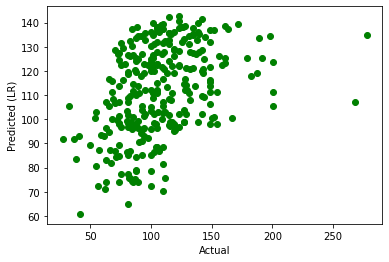

In [73]:
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Actual')
plt.ylabel('Predicted (LR)')

Text(0, 0.5, 'Predicted (RIDGE)')

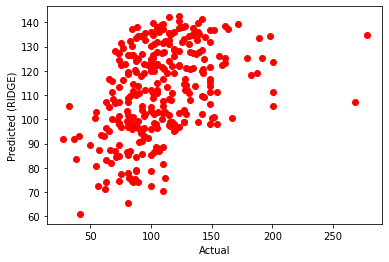

In [75]:
plt.scatter(y_test, y_pred_ridge, c = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted (RIDGE)')

Text(0, 0.5, 'Predicted (LASSO)')

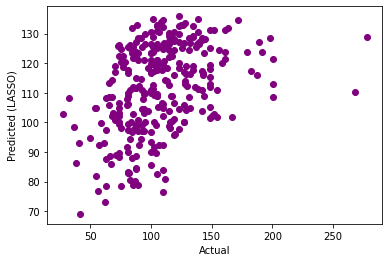

In [76]:
plt.scatter(y_test, y_pred_lasso, c = 'purple')
plt.xlabel('Actual')
plt.ylabel('Predicted (LASSO)')

In [77]:
X_test

array([[56.,  0.,  0., ...,  0.,  1.,  0.],
       [25.,  1.,  0., ...,  1.,  1.,  0.],
       [22.,  0.,  0., ...,  0.,  1.,  1.],
       ...,
       [57.,  1.,  0., ...,  1.,  0.,  0.],
       [37.,  0.,  0., ...,  0.,  1.,  1.],
       [40.,  1.,  0., ...,  1.,  1.,  0.]])

D:\Anaconda\envs\openweather\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


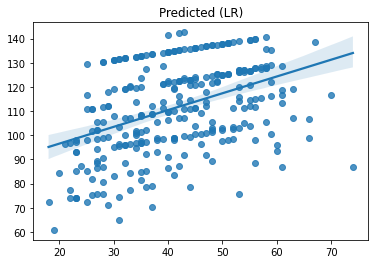

In [83]:
#!conda install seaborn
#!pip install seaborn

import seaborn as sns


sns.regplot(X_test[:,0], y_pred, fit_reg = True)
plt.title('Predicted (LR)')
plt.show()

D:\Anaconda\envs\openweather\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


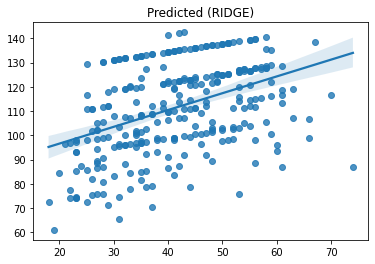

In [84]:
sns.regplot(X_test[:,0], y_pred_ridge, fit_reg = True)
plt.title('Predicted (RIDGE)')
plt.show()